# Fully Connected NN (Question 1a)

In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms


# Import Data

In [2]:
from torchvision import datasets
data_path = '../dataset/cifar10'
cifar10     = datasets.CIFAR10(data_path, train=True , download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cifar10_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}
sample_image = 70

## verify data

5 : dog
  <PIL.Image.Image image mode=RGB size=32x32 at 0x7F0544051CD0>


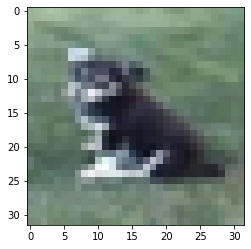

In [4]:
img, label = cifar10[sample_image]
print(f'{label} : {cifar10_map[label]}\n  {img}')
plt.imshow(img)
plt.show()

In [5]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

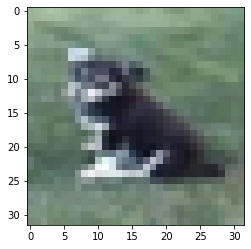

In [6]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

# get std deviation and mean

In [7]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [8]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [9]:
data_mean = imgs.view(3, -1).mean(dim=1)
data_std  = imgs.view(3, -1).std(dim=1)

print(f'mean = {data_mean}')
print(f'std = {data_std}')

mean = tensor([0.4914, 0.4822, 0.4465])
std = tensor([0.2470, 0.2435, 0.2616])


In [10]:
transforms.Normalize(data_mean, data_std)

Normalize(mean=tensor([0.4914, 0.4822, 0.4465]), std=tensor([0.2470, 0.2435, 0.2616]))

# Better import  

In [11]:
# to save memory
del cifar10, cifar10_val, tensor_cifar10, imgs
try:
    cifar10[0]
    print("not deleted")
except:
    print("deleted")

deleted


In [12]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(data_mean, # mean of entire dataset
                             data_std) # std deviation of entire dataset
    ]))

In [13]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(data_mean, data_std)
    ]))

## verify data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


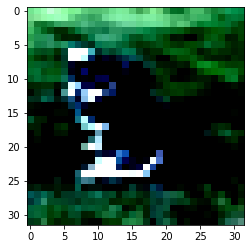

torch.Size([3, 32, 32])


3072

In [14]:
img, label = cifar10[sample_image]

plt.imshow(img.permute(1, 2, 0))
plt.show()

print(img.shape)
torch.numel(img)

# 1 layer NN
part a

## Setup

In [15]:
import torch.nn as nn
from collections import OrderedDict


n_in = torch.numel(img)  # Number of elements in 3 x 32 x 32 image
                         # IE.  3072
n_out = len(cifar10_map) # number of possible outputs
                         # IE.  10
n_inner = 512 


model = nn.Sequential(OrderedDict([
        ("hidden_layer",
        nn.Linear(
            n_in,
            512,   
        )),
        ("hidden_activation",
        nn.Tanh()
        ),
        ("output",
        nn.Linear(
            512,   
            n_out, 
        )),
        ("softmax",
        nn.LogSoftmax(dim=1)
        ),
    ]))
model

Sequential(
  (hidden_layer): Linear(in_features=3072, out_features=512, bias=True)
  (hidden_activation): Tanh()
  (output): Linear(in_features=512, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [16]:
loss = nn.NLLLoss()

## setup test

In [17]:
img, label = cifar10[sample_image]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(2.4943, grad_fn=<NllLossBackward0>)

## full data
left in raw text to preserve

### training function

### training

## mini batches


### training function

In [18]:
import time

def training(training_imgs, loss_fn, optimizer, n_epochs:int, report_period:int = 10):
    sum_time = 0
    for epoch in range(n_epochs + 1):
        start = time.time()
        
        for img, label in training_imgs:
            out = model(img.view(img.shape[0], -1))
            loss = loss_fn(out, label)
                    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        sum_time += time.time() - start
        if ((epoch % report_period) == 0) or (epoch == n_epochs):
            print(f"Epoch: {epoch}\t Loss: {float(loss):.12f}\t AvgTime: {sum_time/(epoch+1):.2f} s")

### training

In [19]:
train_loader = torch.utils.data.DataLoader(
                    cifar10, 
                    batch_size=64,
                    shuffle=True
                    )

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 300

model

Sequential(
  (hidden_layer): Linear(in_features=3072, out_features=512, bias=True)
  (hidden_activation): Tanh()
  (output): Linear(in_features=512, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [20]:
training(train_loader, 
         loss_fn, 
         optimizer, 
         n_epochs,
         report_period=5
         )

Epoch: 0	 Loss: 1.679373025894	 AvgTime: 10.34 s
Epoch: 5	 Loss: 1.794926166534	 AvgTime: 11.67 s
Epoch: 10	 Loss: 1.001077055931	 AvgTime: 11.28 s
Epoch: 15	 Loss: 1.598965048790	 AvgTime: 11.00 s
Epoch: 20	 Loss: 1.134561538696	 AvgTime: 10.85 s
Epoch: 25	 Loss: 0.952991008759	 AvgTime: 10.76 s
Epoch: 30	 Loss: 0.739563584328	 AvgTime: 10.87 s
Epoch: 35	 Loss: 0.447977125645	 AvgTime: 10.85 s
Epoch: 40	 Loss: 0.258433550596	 AvgTime: 10.88 s
Epoch: 45	 Loss: 0.645227193832	 AvgTime: 10.97 s
Epoch: 50	 Loss: 0.309659212828	 AvgTime: 11.06 s
Epoch: 55	 Loss: 0.174941867590	 AvgTime: 11.09 s
Epoch: 60	 Loss: 0.196170285344	 AvgTime: 11.03 s
Epoch: 65	 Loss: 0.101451955736	 AvgTime: 10.98 s
Epoch: 70	 Loss: 0.083778798580	 AvgTime: 10.95 s
Epoch: 75	 Loss: 0.093564406037	 AvgTime: 10.92 s
Epoch: 80	 Loss: 0.050373222679	 AvgTime: 10.96 s
Epoch: 85	 Loss: 0.054337263107	 AvgTime: 10.92 s
Epoch: 90	 Loss: 0.048423580825	 AvgTime: 11.00 s
Epoch: 95	 Loss: 0.037594173104	 AvgTime: 10.98 s
Ep

In [21]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))
print("Total:", total)

Accuracy: 1.000000
Total: 50000


In [22]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))
print("Total:", total)

Accuracy: 0.469600
Total: 10000
